<a href="https://colab.research.google.com/github/A-Kutscher/Project-2/blob/main/Project_2_Cirrhosis_AK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2 - Cirrhosis**
Author: Amber Kutscher

### Data Dictionary

- ID: unique identifier

- N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

- Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

- Drug: type of drug D-penicillamine or placebo

- Age: age in [days]

- Sex: M (male) or F (female)

- Ascites: presence of ascites N (No) or Y (Yes)

- Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

- Spiders: presence of spiders N (No) or Y (Yes)

- Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

- Bilirubin: serum bilirubin in [mg/dl]

- Cholesterol: serum cholesterol in [mg/dl]

- Albumin: albumin in [gm/dl]

- Copper: urine copper in [ug/day]

- Alk_Phos: alkaline phosphatase in [U/liter]

- SGOT: SGOT in [U/ml]

- Triglycerides: triglicerides in [mg/dl]

- Platelets: platelets per cubic [ml/1000]

- Prothrombin: prothrombin time in seconds [s]

- Stage: histologic stage of disease (1, 2, 3, or 4)

## Imports and Mount Drive

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


_______________________________________________________________

### Load Dataset

In [3]:
# Load in data
fpath = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/cirrhosis[1].csv"
df = pd.read_csv(fpath)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

### Questions & Answers

1. Source of data
  - [Cirrhosis Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset)

2. Brief description of data
  - Cirrhosis is a late stage of liver scarring (fibrosis) brought on by a variety of liver disorders and conditions, including prolonged alcoholism and hepatitis. The information gathered during the 1974-1984 Mayo Clinic trial on primary biliary cirrhosis (PBC) of the liver is presented here. 424 PBC patients who were referred to Mayo Clinic during the course of that ten-year period qualified for the drug D-penicillamine's randomized placebo-controlled trial. The dataset's initial 312 cases, which took part in the randomized study, include mostly complete data. Although the extra 112 individuals declined to take part in the clinical experiment, they agreed to have some basic measurements taken and to be monitored for survival. The data presented here include 312 randomized individuals as well as an extra 106 cases because six of those cases were lost to follow-up shortly after diagnosis.

3. What is the target?
  - Status

4. What does one row represent? (A person? A business? An event? A product?)
  - Each row represents a patient (person).

5. Is this a classification or regression problem?
  - This is a regression problem.

6. How many features does the data have?
  - This dataset has 20 features.

7. How many rows are in the dataset?
  - There are 418 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - None that I can think of at the moment.

## Data Cleaning

In [5]:
# Inspect the dataset
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
# List of object columns
object_cols = df.select_dtypes(include='object').columns
df[object_cols].describe()

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,312,418,312,312,312,418
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


### Unnecessary Columns

In [7]:
# Remove any unnecessary columns
cols_to_drop = ["ID"]
df_cleaned = df.drop(columns=cols_to_drop)

### Duplicates

In [8]:
# Drop duplicated rows
df_cleaned = df_cleaned.drop_duplicates()

### Missing Values

In [9]:
# Identify and address any missing values
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [10]:
# Address missing values
# For simplicity, let's fill missing numeric values with the median and categorical values with the mode
num_cols = df_cleaned.select_dtypes(include=np.number).columns
cat_cols = df_cleaned.select_dtypes(include=["object"]).columns
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")
df_cleaned[num_cols] = num_imputer.fit_transform(df_cleaned[num_cols])
df_cleaned[cat_cols] = cat_imputer.fit_transform(df_cleaned[cat_cols])

In [11]:
# Standardize categorical values
cat_cols = ["Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Drug", "Status"]
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].str.capitalize()

## Univariate Visuals

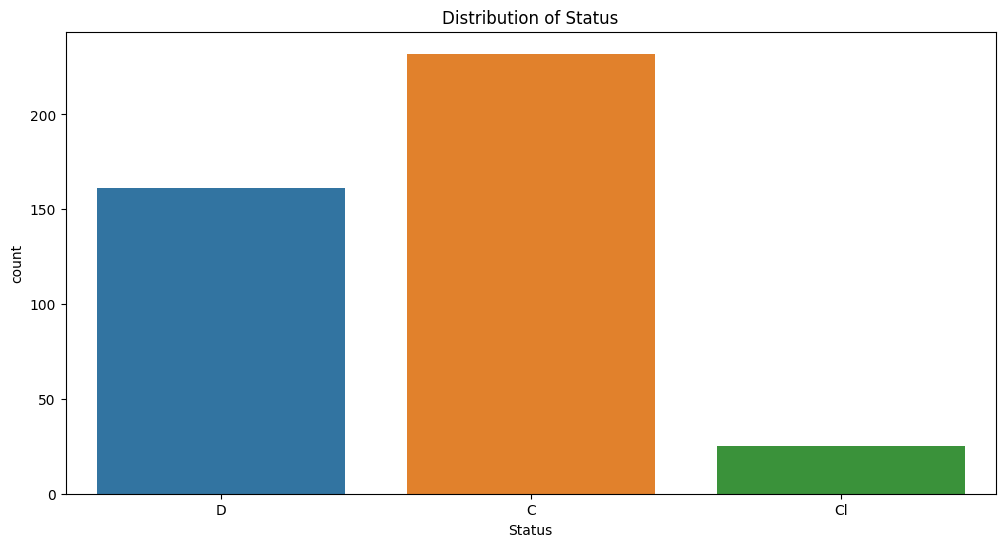

In [12]:
# Univariate visuals for target and features
plt.figure(figsize=(12, 6))
sns.countplot(x="Status", data=df_cleaned)
plt.title("Distribution of Status")
plt.show()

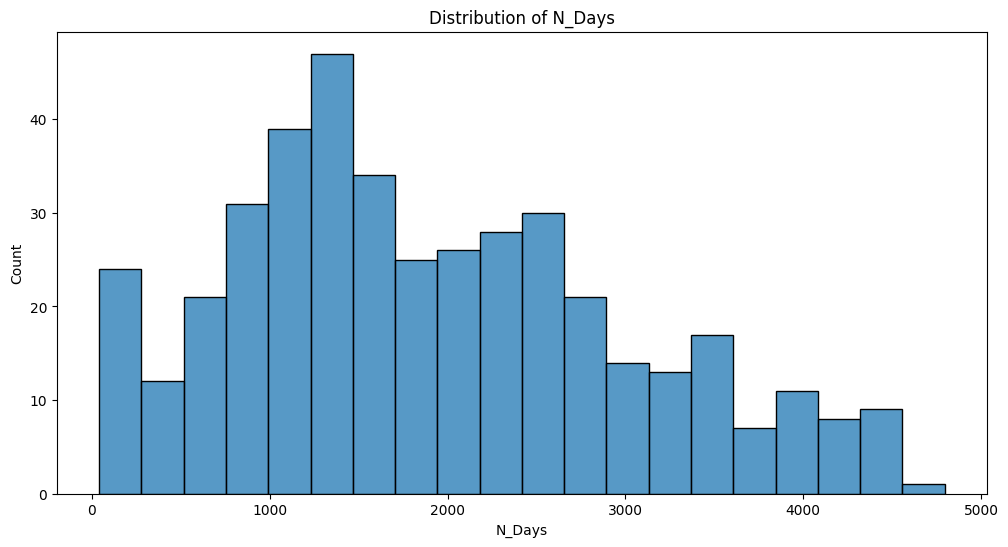

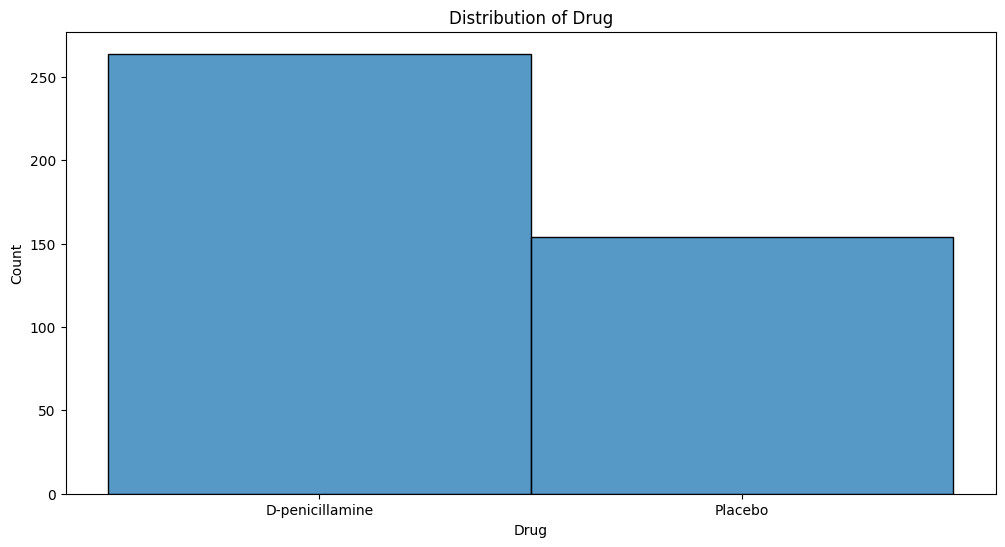

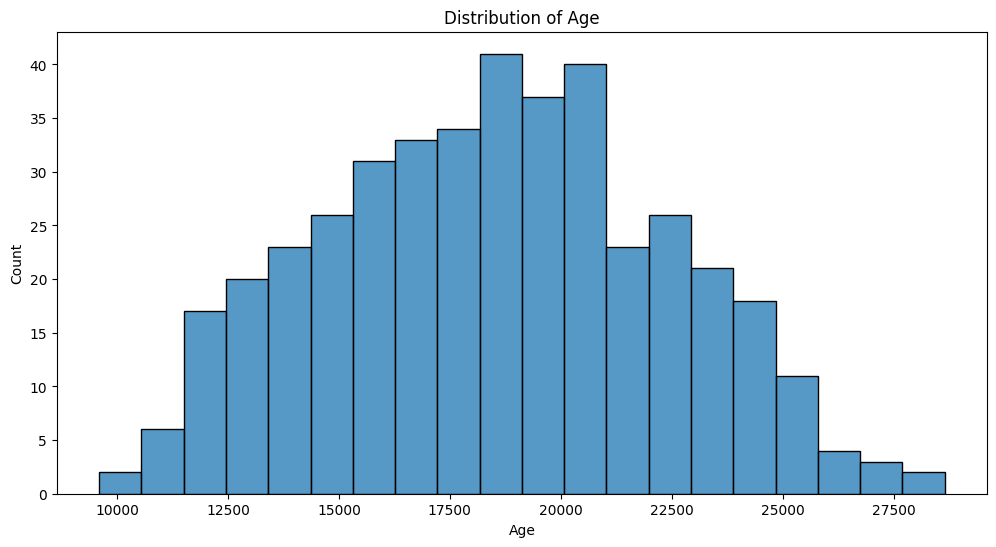

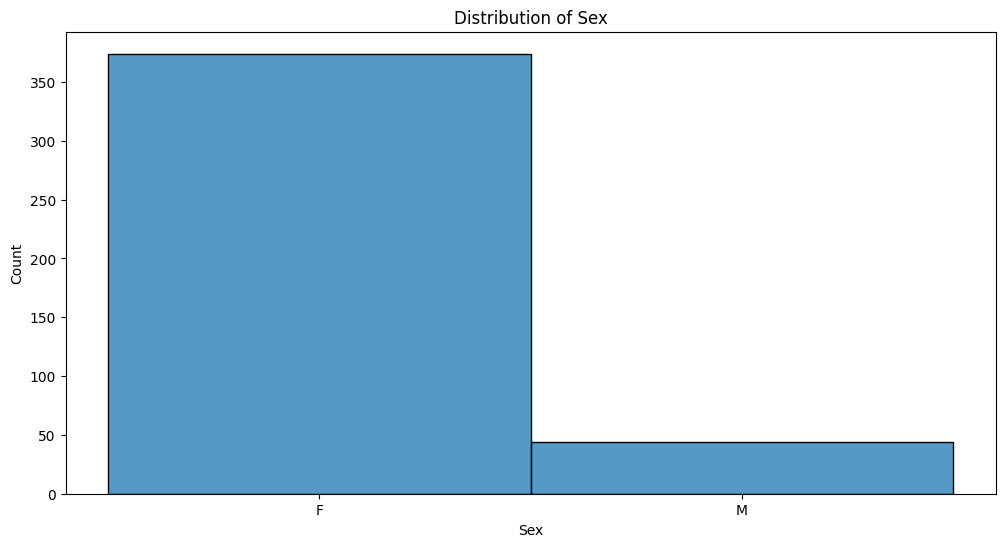

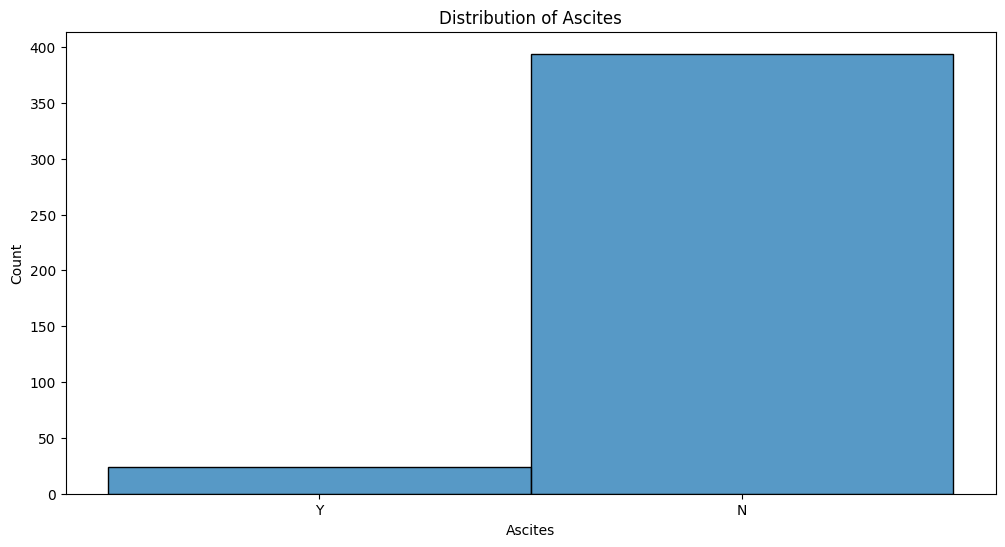

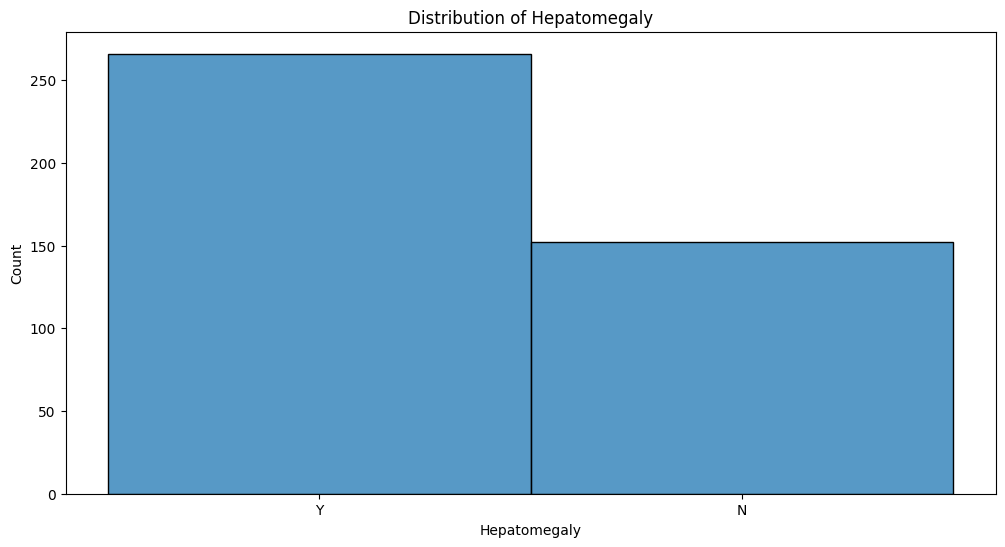

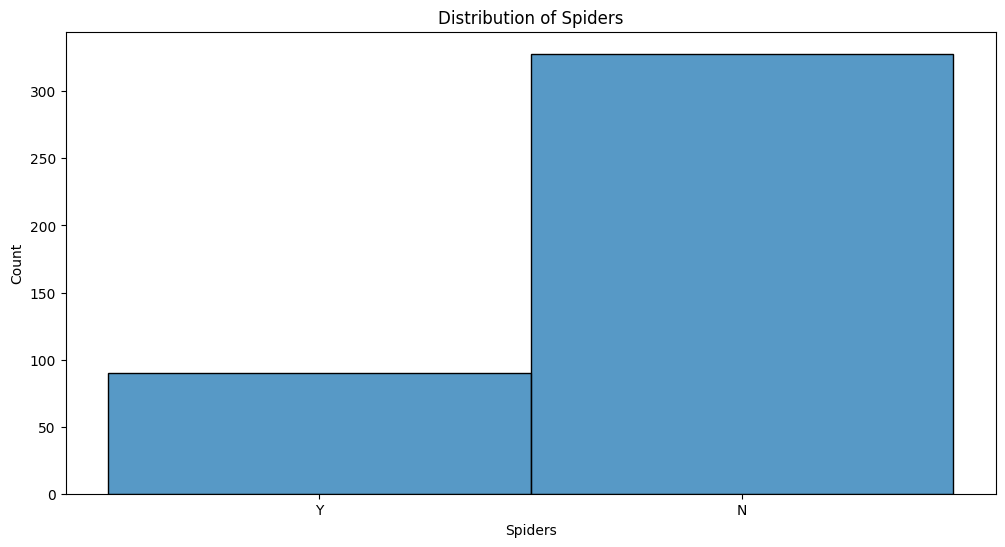

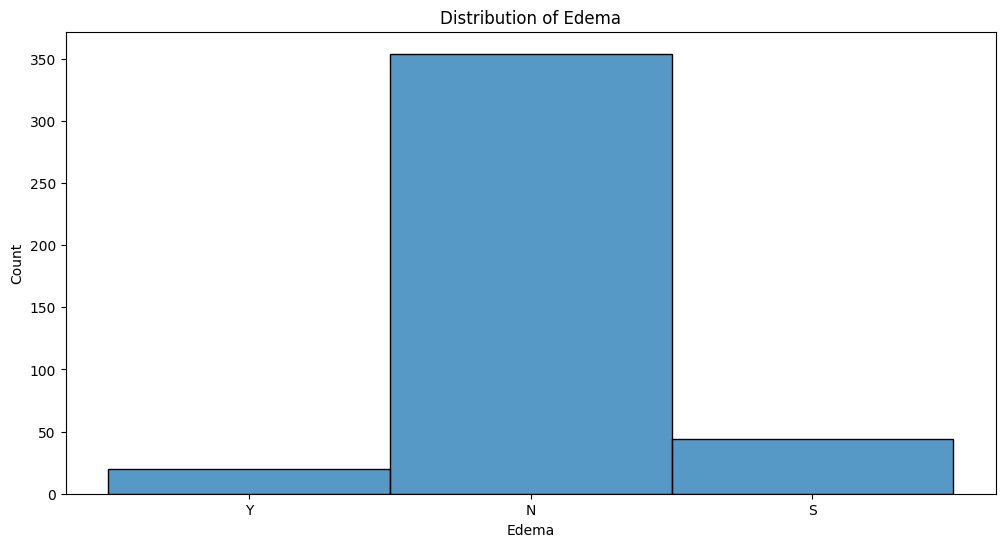

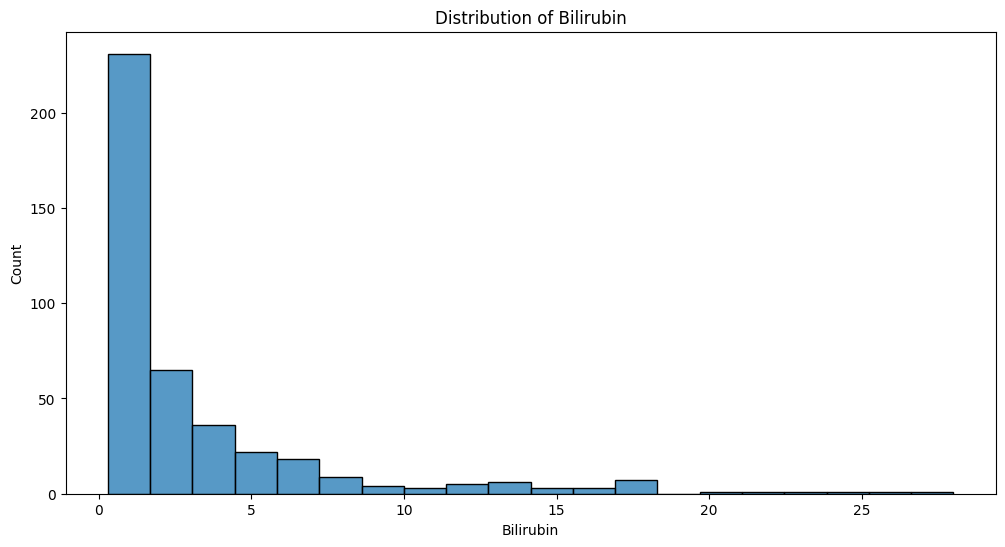

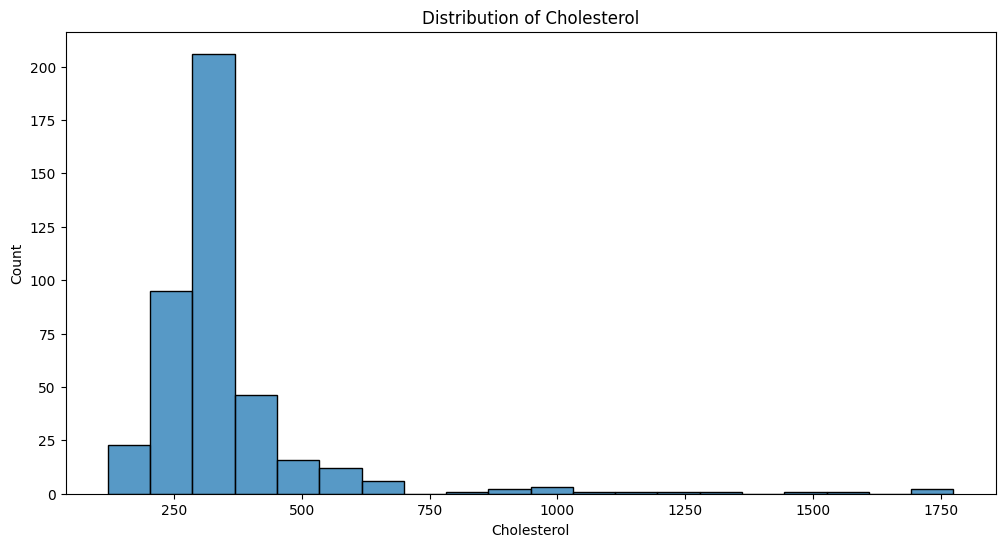

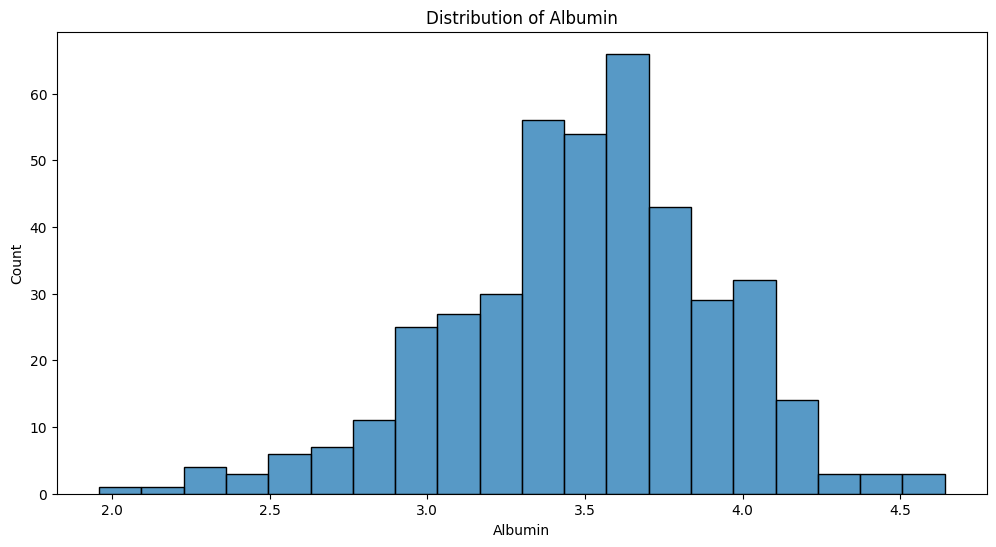

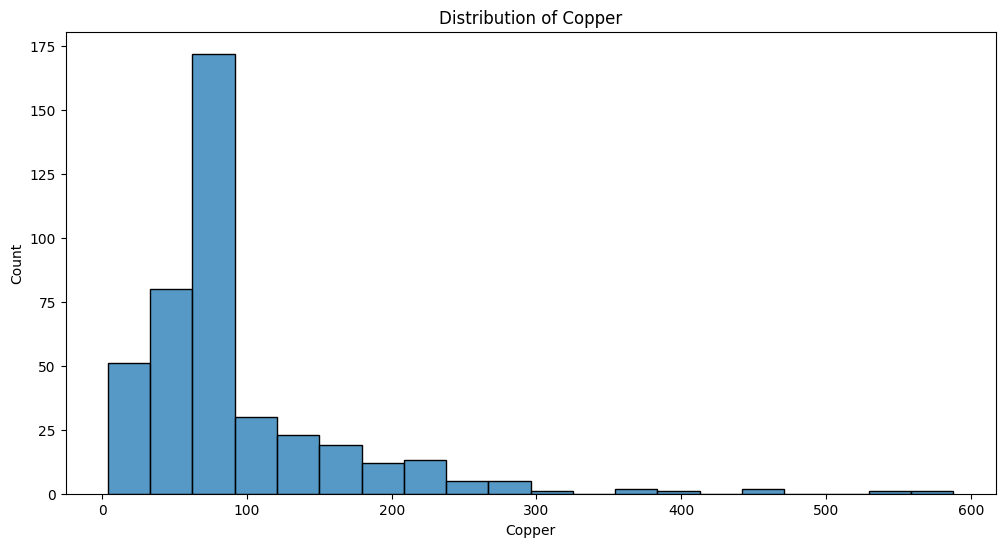

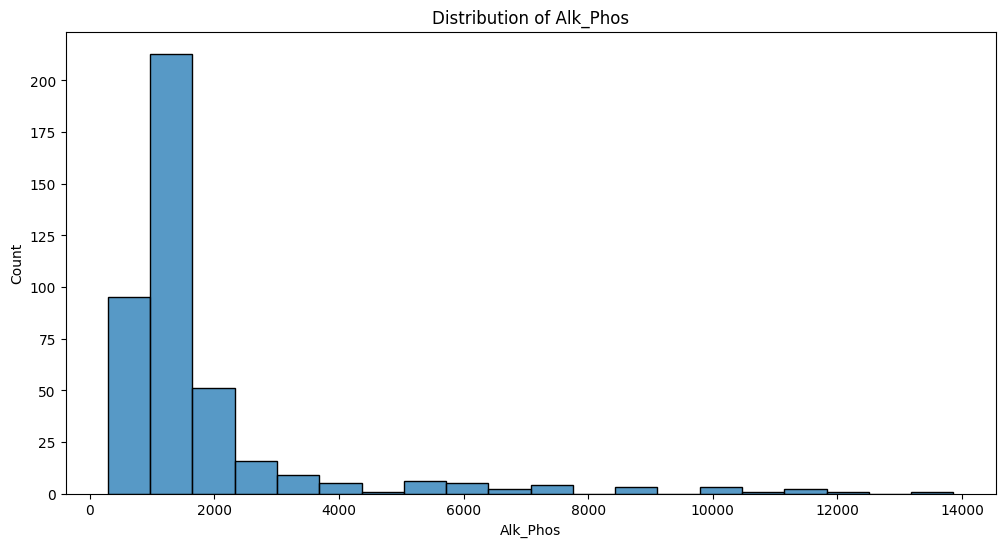

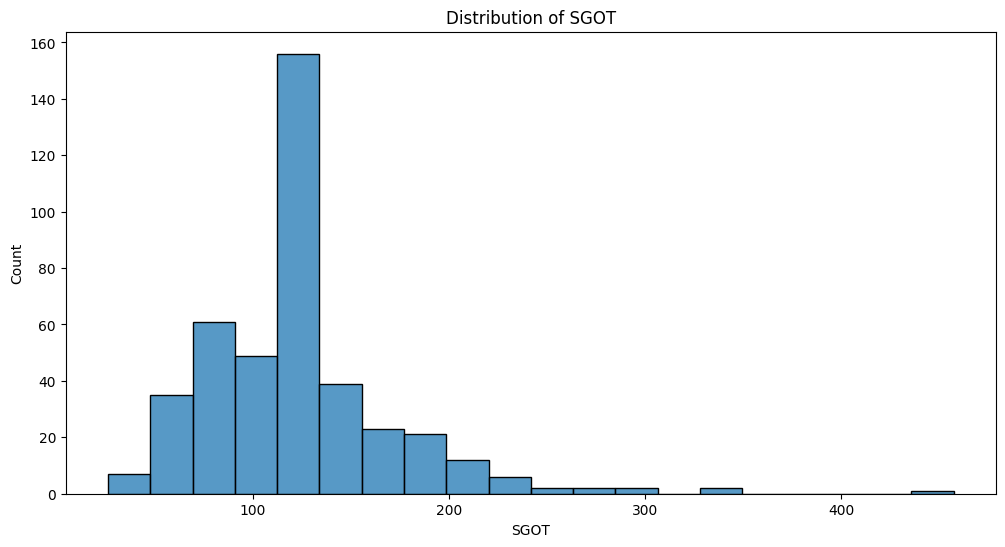

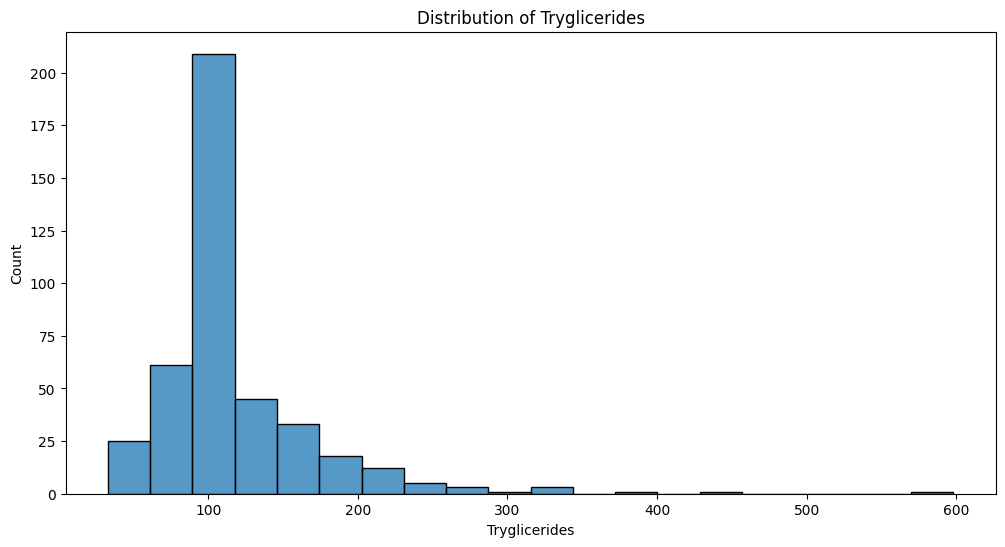

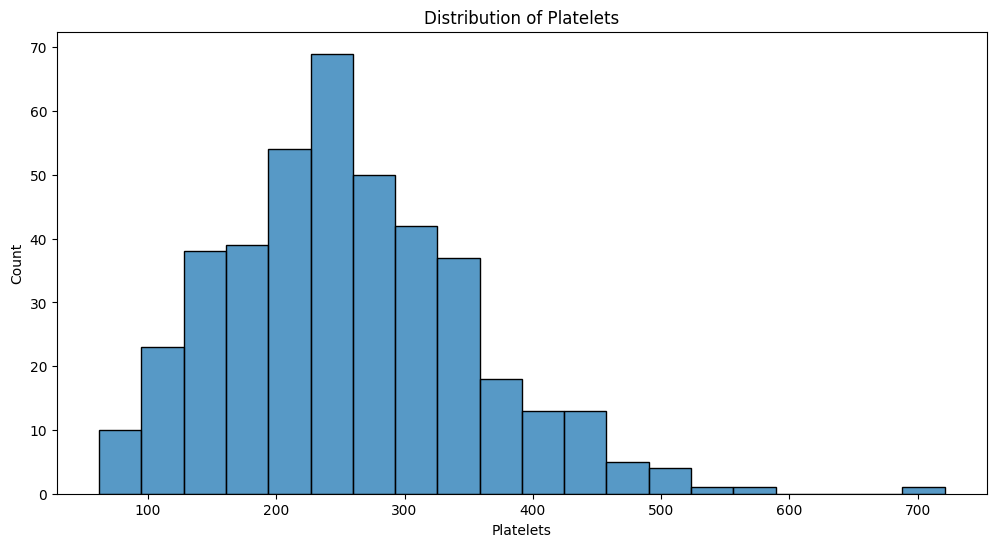

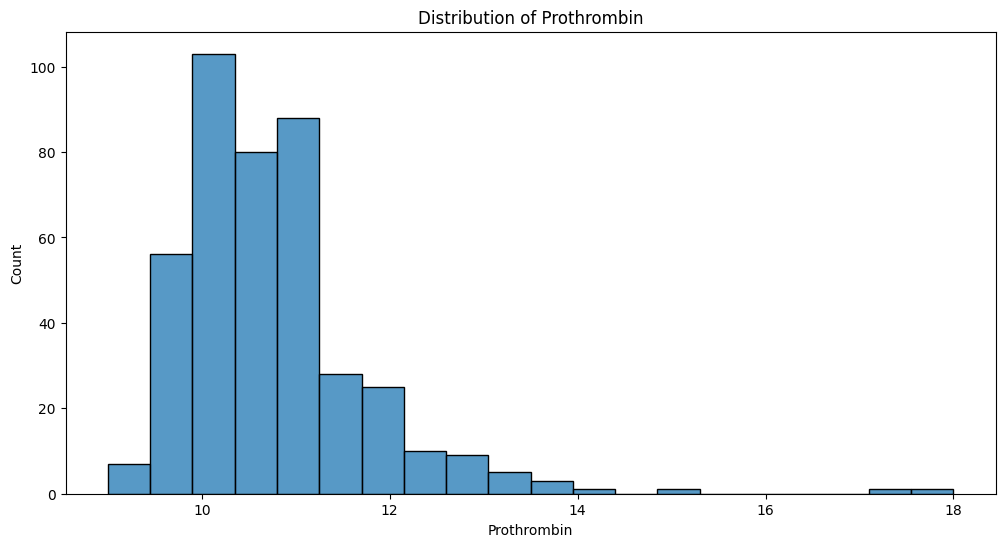

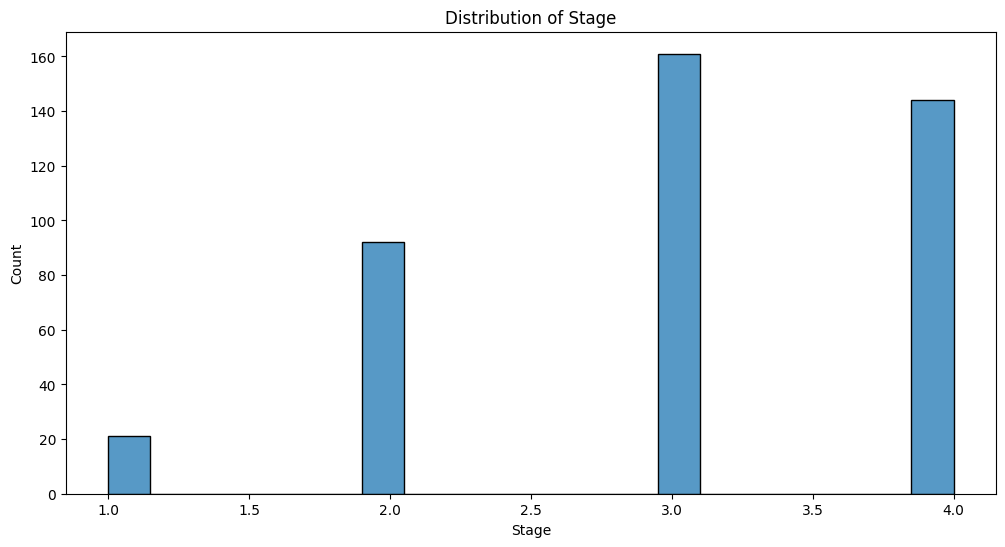

In [13]:
for col in df_cleaned.columns:
    if col != "Status":
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df_cleaned, x=col, bins=20)
        plt.title(f"Distribution of {col}")
        plt.show()

## Outliers

In [14]:
# Identify and store outliers
outliers = {}

In [15]:
# Identify and address outliers
num_cols = df_cleaned.select_dtypes(include=np.number).columns
for col in num_cols:
    mean = df_cleaned[col].mean()
    std = df_cleaned[col].std()
    col_outliers = df_cleaned[(df_cleaned[col] < mean - 2 * std) | (df_cleaned[col] > mean + 2 * std)][col]
    outliers[col] = col_outliers.tolist()

In [16]:
# Display outliers for each numeric variable
for col, values in outliers.items():
    print(f"Outliers in {col}: {values}")

Outliers in N_Days: [4500.0, 4232.0, 4509.0, 4523.0, 4467.0, 4453.0, 4556.0, 4427.0, 4459.0, 4365.0, 4256.0, 4191.0, 4196.0, 4184.0, 4190.0, 4795.0, 4214.0]
Outliers in Age: [28018.0, 26259.0, 10550.0, 27398.0, 10795.0, 26580.0, 28650.0, 27220.0, 9598.0, 27394.0]
Outliers in Bilirubin: [14.5, 12.6, 17.4, 21.6, 17.2, 22.5, 20.0, 17.1, 12.2, 14.4, 17.4, 16.2, 17.4, 28.0, 25.5, 14.0, 24.5, 14.1, 13.0, 17.9, 12.6, 16.0, 15.0, 18.0, 13.8, 16.0, 14.0, 13.6]
Outliers in Cholesterol: [1128.0, 932.0, 1600.0, 950.0, 1775.0, 1015.0, 1480.0, 808.0, 1092.0, 932.0, 1276.0, 1336.0, 1712.0, 1000.0]
Outliers in Albumin: [2.6, 2.54, 2.27, 2.54, 4.64, 2.53, 4.4, 2.64, 2.56, 4.52, 4.38, 2.43, 1.96, 2.33, 2.1, 2.23, 2.48, 4.38, 2.31, 4.52, 2.58, 2.38]
Outliers in Copper: [588.0, 464.0, 558.0, 281.0, 262.0, 280.0, 269.0, 444.0, 262.0, 247.0, 290.0, 243.0, 358.0, 251.0, 267.0, 412.0, 308.0, 380.0]
Outliers in Alk_Phos: [7394.8, 6121.8, 9009.8, 6064.8, 5719.0, 5833.0, 7277.0, 9933.2, 7277.0, 12258.8, 6931.2, 

In [17]:
# Display cleaned data
df_cleaned.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504.0,Cl,Placebo,13918.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [19]:
# Check for any remaining null values after cleaning
df_cleaned.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64